In [51]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics
from scipy import integrate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import scipy.special
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm


#### Problem : 1 & 2
Calculate the mean, median, mode and standard deviation for the problem 
statements 1& 2.

1) The marks awarded for an assignment set for a Year 8 class of 20 students were as follows:

6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8 

2)  The number of calls from motorists per day for roadside service was recorded for a particular month:

28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170, 
100, 75, 104, 97, 75,123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109


#### Formula for Mean, Median and mode:
Mean- It's nothing but average

Median:

    If Number of terms is odd:
    
        median = (N+1)/2 th term
        
    If Number of terms is Even:
    
        Median = 1/2((N/2)+(N+1)/2) th term
        
Mode:

    Most often occuring number
    
Standard Deviation:

    \sigma={\sqrt {\frac {\sum(x_{i}-{\mu})^{2}}{N}}}
   
        

In [9]:
X = [6,7,5,7,7,8,7,6,9,7,4,10,6,8,8,9,5,6,4,8]
Y= [28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170, 100, 75, 104, 97, 75,123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109]
mean_X = np.mean(X)
mean_Y = np.mean(Y)
median_X = np.median(X)
median_Y = np.median(Y)
mode_X = stats.mode(X)
mode_Y = stats.mode(Y)
std_X = statistics.stdev(X)
std_Y = statistics.stdev(Y)
print("The mean of X is:",mean_X)
print("The mean of Y is:",mean_Y)
print("The median of X is:",mean_X)
print("The median of Y is:",mean_Y)
print("The mode of X is:",mode_X)
print("The mode of Y is:", mode_Y)
print("The mode of X is:",std_X)
print("The mode of Y is:", std_Y)

The mean of X is: 6.85
The mean of Y is: 107.51428571428572
The median of X is: 6.85
The median of Y is: 107.51428571428572
The mode of X is: ModeResult(mode=array([7]), count=array([5]))
The mode of Y is: ModeResult(mode=array([75]), count=array([4]))
The mode of X is: 1.6311119875071343
The mode of Y is: 39.33892805484412


#### Problem 2:
The number of times I go to the gym in weekdays, are given below along with its 
associated probability:
    
x = 0, 1, 2, 3, 4, 5

f(x) = 0.09, 0.15, 0.40, 0.25, 0.10, 0.01

Calculate the mean no. of workouts in a week. Also evaluate the variance involved in 
it.

#### Formula:
Mean : summation of(x_i *f(x_i)) for all i
Variance: summation((x-mean(x))^2)*f(x)/sum(f(x))

In [28]:
x = np.array([0, 1, 2, 3, 4, 5])
f_x =np.array([0.09, 0.15, 0.40, 0.25, 0.10, 0.01])
x.reshape((1,-1))
f_x.reshape((-1,1))
mean=np.dot(x,f_x)
variance_of_x=(x-mean)**2
variance = (np.dot(variance_of_x.reshape(1,-1),f_x))/sum(f_x)
print(f"Mean no. of workouts: {mean}")
print(f"Variance of workouts: {variance}")


Mean no. of workouts: 2.15
Variance of workouts: [1.2275]


In [26]:
#### Problem 4:
Let the continuous random variable D denote the diameter of the hole drilled in an aluminum sheet. 
The target diameter to be achieved is 12.5mm. Random disturbances in the process often result in inaccuracy.
Historical data shows that the distribution of D can be modelled by the PDF (𝑑) = 20𝑒−20(𝑑−12.5), 𝑑 ≥ 12.5. If a part with diameter > 12.6 mm needs to be scrapped, what is the proportion of those parts? What is the CDF when the diameter is of 11mm? What is your conclusion regarding the proportion of scraps?

In [30]:
#PDF (𝑑) = 20𝑒−20(𝑑−12.5)
#𝑑 ≥ 12.5
PDF=lambda d:20*(np.exp((-20*(d-12.5))))
x = 12.6
P_x=integrate.quad(PDF,12.6,np.inf)
y = 11
CDF=integrate.quad(PDF,-np.inf,y)
print(f"Proportion of Parts need to scrapped when d >12.6mm is :{P_x[0]}")
print(f"CDF when d= 11mm is:{CDF[0]}")
print(f"Proportion of CDF when d>12.5mm is : {integrate.quad(PDF,12.5,np.inf)[0]}")

#Conclusion
#The function is only valid when d>=12.5. 
#When d<12.5, the part can be reworked to 12.5 so no scrap in this case.
#PDF is not defined for d=11

Proportion of Parts need to scrapped when d >12.6mm is :0.13533528323661398
CDF when d= 11mm is:nan
Proportion of CDF when d>12.5mm is : 1.0000000000000024


<ipython-input-30-5ed2f695cae4>:3: RuntimeWarning: overflow encountered in exp
  PDF=lambda d:20*(np.exp((-20*(d-12.5))))
<ipython-input-30-5ed2f695cae4>:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  CDF=integrate.quad(PDF,-np.inf,y)


#### Problem 5: 
A company manufactures LED bulbs with a faulty rate of 30%. If I randomly select 6 
chosen LEDs, what is the probability of having 2 faulty LEDs in my sample? 
Calculate the average value of this process. Also evaluate the standard deviation 
associated with it.

In [34]:

add = sum(np.random.binomial(6, 0.3, 50000) == 2)/50000
print(add)
n = 6
p = 0.3
mean , var = binom.stats(n, p)
std = var**0.5
print('Mean is',mean)
print('Standard deviation for this process is',std)

0.3253
Mean is 1.7999999999999998
Standard deviation for this process is 1.1224972160321822


#### Problem 6: 
Gaurav and Barakha are both preparing for entrance exams. Gaurav attempts to 
solve 8 questions per day with a correction rate of 75%, while Barakha averages 
around 12 questions per day with a correction rate of 45%. What is the probability 
that each of them will solve 5 questions correctly? What happens in cases of 4 and 6 
correct solutions? What do you infer from it? What are the two main governing 
factors affecting their ability to solve questions correctly? Give a pictorial 
representation of the same to validate your answer

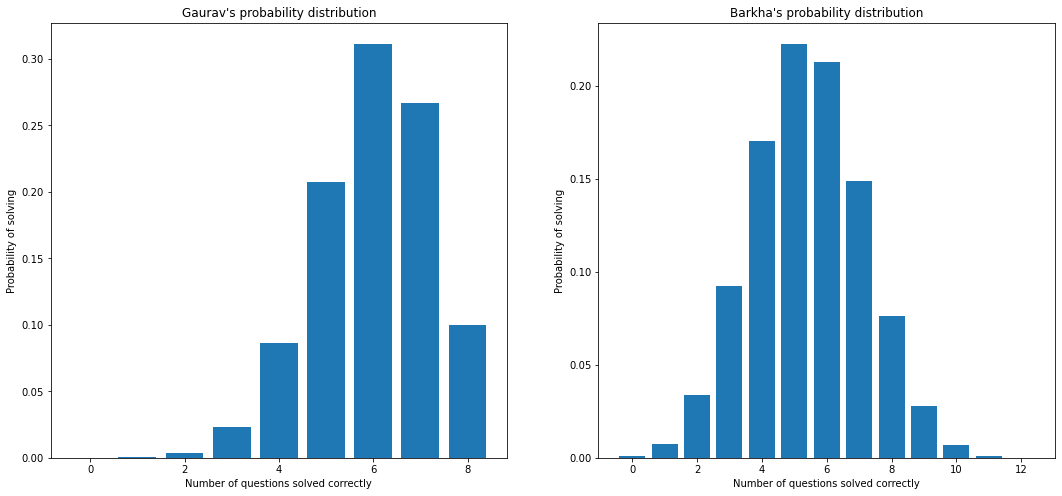

In [37]:

# setting the values of n and p  
n_Gaurav = 8
p_Gaurav = 0.75
n_Barkha = 12
p_Barkha = 0.45
# defining list of r values 
r_values_Gaurav = list(range(n_Gaurav + 1)) 
r_values_Barkha = list(range(n_Barkha + 1)) 
# list of pmf values 
dist_Gaurav = [binom.pmf(r, n_Gaurav, p_Gaurav) for r in r_values_Gaurav]
dist_Barkha = [binom.pmf(r, n_Barkha, p_Barkha) for r in r_values_Barkha ]
# plotting the graph  
fig = plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
plt.title('Gaurav\'s probability distribution')
plt.xlabel('Number of questions solved correctly')
plt.ylabel('Probability of solving')
plt.bar(r_values_Gaurav, dist_Gaurav)
plt.subplot(1, 2, 2)
plt.title('Barkha\'s probability distribution')
plt.xlabel('Number of questions solved correctly')
plt.ylabel('Probability of solving')
plt.bar(r_values_Barkha, dist_Barkha) 
plt.show()

In [38]:
print('Probability to solve',r_values_Barkha[4],'correctly for Barkha is', dist_Barkha[4])
print('Probability to solve',r_values_Gaurav[4],'correctly for Gaurav is', dist_Gaurav[4])
print('Probability to solve',r_values_Barkha[6],'correctly for Barkha is', dist_Barkha[6])
print('Probability to solve',r_values_Gaurav[6],'correctly for Gaurav is', dist_Gaurav[6])

Probability to solve 4 correctly for Barkha is 0.16996393213605795
Probability to solve 4 correctly for Gaurav is 0.08651733398437506
Probability to solve 6 correctly for Barkha is 0.21238468214026424
Probability to solve 6 correctly for Gaurav is 0.31146240234375017


The two main factors affecting the ability to solve questions correctly are:

1) Correction rate
2) Number of questions solved per day
As the correction rate increases the chances of the distribution to be left skewed increases. Since Barkha's correction rate is close to 0.5 so highest probability of solving questions is found at around 50% of the total number of questions.

Increasing the number of questions solved daily reduces skewness as well.As the number of questions increases the distribution skewness decreases

#### Problem 7:
Customers arrive at a rate of 72 per hour to my shop. What is the probability of 𝑘
customers arriving in 4 minutes? a) 5 customers, b) not more than 3 customers, c) 
more than 3 customers. Give a pictorial representation of the same to validate your 
answer.

In [41]:
#We need to calculate average number of customers arriving per 4 minutes
#72/60 customers come per minute
mu = 4*(72/60) #customers come per 4 minutes
print(f"The probability of arriving 5 cutomers in 4 minutes is : {poisson.pmf(k=5,mu=mu)}")
print(f"The probability of arriving not more than 3 customers in 4 minutes is : {poisson.pmf(k=3, mu=mu)}")
print(f'The Probability of more than 3 customers arriving in 4 minutes is : {1-poisson.cdf(k=3,mu=mu)}')

The probability of arriving 5 cutomers in 4 minutes is : 0.17474768364388296
The probability of arriving not more than 3 customers in 4 minutes is : 0.15169069760753714
The Probability of more than 3 customers arriving in 4 minutes is : 0.7057700835034357


Text(0, 0.5, 'Probability')

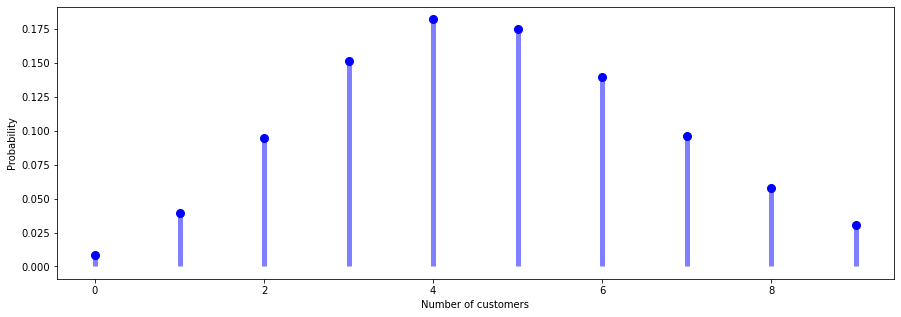

In [42]:
x = list(range(0,10))
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x, poisson.pmf(x,mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.xlabel('Number of customers')
plt.ylabel('Probability')

#### Problem 8:
I work as a data analyst in Aeon Learning Pvt. Ltd. After analyzing data, I make 
reports, where I have the efficiency of entering 77 words per minute with 6 errors per 
hour. What is the probability that I will commit 2 errors in a 455-word financial report?
What happens when the no. of words increases/decreases (in case of 1000 words, 
255 words)? 
How is the 𝜆 affected?
How does it influence the PMF? 
Give a pictorial representation of the same to validate your answer

The pobability of commiting 2 errors in 455 words financial report is :0.09669027375144444
The pobability of commiting 2 errors in 1000 words financial report is :0.23012815007300153
The pobability of commiting 2 errors in 255 words financial report is :0.039377135392854104


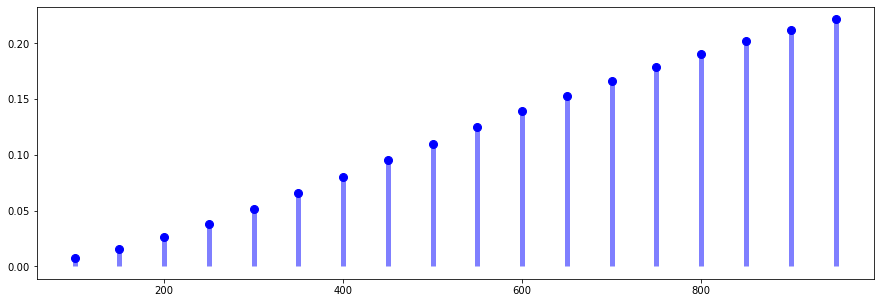

In [43]:
#Rate of entering=77 per minute
#error rate= 6/hour=0.1 per minute
#No of errors per word=0.1/77
unit_mu=0.1/77
def mu(n):
    return n * unit_mu
print(f"The pobability of commiting 2 errors in 455 words financial report is :{poisson.pmf(2,mu=mu(455))}")
print(f"The pobability of commiting 2 errors in 1000 words financial report is :{poisson.pmf(2,mu=mu(1000))}")
print(f"The pobability of commiting 2 errors in 255 words financial report is :{poisson.pmf(2,mu=mu(255))}")
x=range(100,1000,50)
mu=[i*unit_mu for i in x]
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,poisson.pmf(2,mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x,0, poisson.pmf(2,mu), colors='b', lw=5, alpha=0.5)
#As the number of words increase probability of getting errors increases   

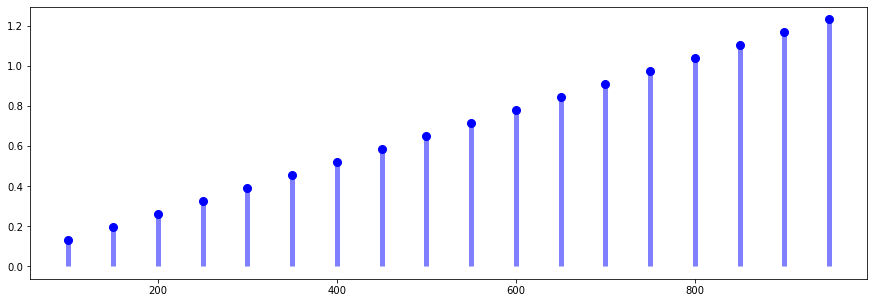

In [44]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,mu, 'bo', ms=8, label='poisson pmf')
ax.vlines(x,0,mu, colors='b', lw=5, alpha=0.5)
#Value of mu keeps on increasing with number of words

#### Problem 9 and 4 are same

#### Problem 10:
    Please compute the following:
a)  P(Z > 1.26), . P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), . P(Z ≤ −4.6)
b) Find the value 𝑧 such that 𝑃(𝑍 > 𝑧) = 0.05
c) Find the value of 𝑧 such that 𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99

In [47]:
def P(z,b=-np.inf) :
    return integrate.quad(norm.pdf,b,z)[0]

print('P(Z>1.26) = %.5f'%(1-P(1.26)))
print('P(Z<-0.86) = %.5f'%P(-0.86))
print('P(Z>-1.37) = %.5f'%(1-P(-1.37)))
print('P(−1.25 < Z < 0.37) = %.5f'%P(0.37,b=-1.25))
print('P(Z ≤ −4.6) = %.5f'%P(-4.6))

P(Z>1.26) = 0.10383
P(Z<-0.86) = 0.19489
P(Z>-1.37) = 0.91466
P(−1.25 < Z < 0.37) = 0.53866
P(Z ≤ −4.6) = 0.00000


In [48]:
print('P(Z>z)=0.05 is %.2f'%(-1*norm.ppf(0.05)))
print('𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is %.2f'%(abs(norm.ppf(0.005))))

P(Z>z)=0.05 is 1.64
𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is 2.58


#### Problem 11:
The current flow in a copper wire follow a normal distribution with a mean of 10 𝑚A 
and a variance of 4 (𝑚𝐴)2. 
What is the probability that a current measurement will exceed 13 𝑚𝐴? What is the 
probability that a current measurement is between 9 and 11mA? Determine the 
current measurement which has a probability of 0.98.

In [49]:
mean = 10
std = np.sqrt(4)

def I(z, b=-np.inf):
    z = (z-mean)/std
    return integrate.quad(norm.pdf,b,z)[0]
print(f"Probability that current > 13mA is: {1-I(13)}")
print(f"Probability that current is between 9 mA and 11 mA is : {1-I(11,b=9)}")

Probability that current > 13mA is: 0.06680720126885797
Probability that current is between 9 mA and 11 mA is : 1.3085375387259144


#### Problem Statement 12:
The shaft in a piston has its diameter normally distributed with a mean of 0.2508 inch 
and a standard deviation of 0.0005 inch. The specifications of the shaft are 0.2500 ∓
0.0015 inch. What proportion of shafts are in sync with the specifications? If the 
process is centered so that the mean is equal to the target value of 0.2500, what 
proportion of shafts conform to the new specifications? What is your conclusion from 
this experiment?


In [50]:
mean_dia=0.2508
std_dia=0.0005
#specified dia in the range of 0.2485<d<0.2515
#case-1 if mean_dia=0.2508
def I(mean,std,a,b) :
  #gives P(Z<=x)
  a=(a-mean)/std
  b=(b-mean)/std
print(f"Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:{0.2508,I(0.2508,0.0005,0.2485,0.2515)}")
print(f"Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:{0.2500,I(0.2500,0.0005,0.2485,0.2515)}")

Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:(0.2508, None)
Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:(0.25, None)
